In [1]:
# Import libraries and load data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('chess_games_20240721_195845.csv')

# Display the first few rows
df.head()

,Date,White,Black,Result,WhiteElo,BlackElo,TimeControl,Termination,Moves
0,2024.07.07,bobiphicher,trlnkle,0-1,1057,1052,600,trlnkle won by resignation,1. d4 d5 2. e3 Nf6 3. g3 c5 4. Bg2 e6 5. c3 c4...
1,2024.07.07,trlnkle,turkidelight,1-0,1060,1030,600,trlnkle won by resignation,1. e4 e5 2. Qh5 Nc6 3. Bc4 g6 4. Qf3 Nf6 5. Nc...
2,2024.07.07,Fahrettin4040,trlnkle,1-0,1078,1052,600,Fahrettin4040 won by resignation,1. e4 e5 2. Bc4 Nf6 3. d3 Bc5 4. Bg5 h6 5. Bxf...
3,2024.07.07,donovanrussell,trlnkle,1-0,1073,1044,600,donovanrussell won by resignation,1. c3 e5 2. e3 Bc5 3. Qb3 Nf6 4. Nf3 d6 5. Ng5...
4,2024.07.07,trlnkle,basems,1-0,1051,1013,600,trlnkle won - game abandoned,1. e4 d5 2. exd5 Qxd5 3. d3 Nf6 4. Nf3 Nc6 5. ...


# Chess Game Analysis

This notebook analyzes my last 50 chess games from Chess.com. editors note: I'm trying to make the leap from 1050 elo to ~1400-1500. 

The formatting and syntax is done by claude 3.5 sonnet. 

## Data Overview

In [2]:
# Information about the dataset
df.info()

# Display summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         50 non-null     object
 1   White        50 non-null     object
 2   Black        50 non-null     object
 3   Result       50 non-null     object
 4   WhiteElo     50 non-null     int64 
 5   BlackElo     50 non-null     int64 
 6   TimeControl  50 non-null     int64 
 7   Termination  50 non-null     object
 8   Moves        50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


,WhiteElo,BlackElo,TimeControl
count,50.000000,50.000000,50.000000
mean,924.900000,921.860000,406.800000
std,172.921977,171.378803,232.312597
min,619.000000,591.000000,60.000000
25%,773.000000,776.000000,180.000000
50%,1047.500000,1032.000000,600.000000
75%,1070.000000,1059.000000,600.000000
max,1104.000000,1107.000000,600.000000


## Win/Loss Ratio Analysis

Result
1-0        28
0-1        19
1/2-1/2     3
Name: count, dtype: int64


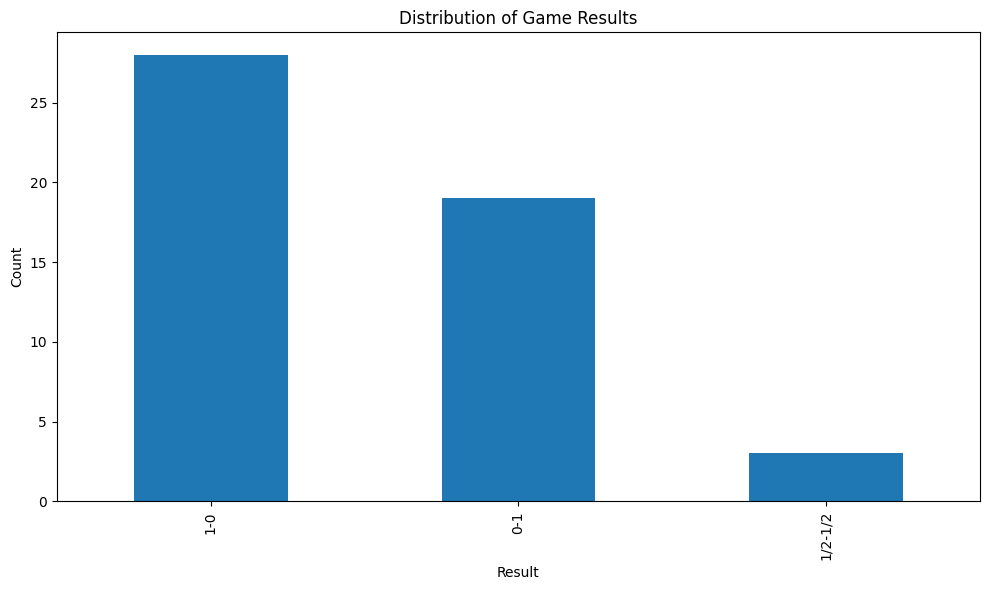

In [3]:
# Count the number of games with each result
result_counts = df['Result'].value_counts()
print(result_counts)

# Visualize the results
plt.figure(figsize=(10, 6))
result_counts.plot(kind='bar')
plt.title('Distribution of Game Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Performance as White vs. Black

PlayedAs
Black    0.4
White    0.6
dtype: float64


C:\Users\james\AppData\Local\Temp\ipykernel_6752\776876429.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  win_percentages = df.groupby('PlayedAs').apply(lambda x: (x['Result'] == '1-0').mean() if x.name == 'White' else (x['Result'] == '0-1').mean())


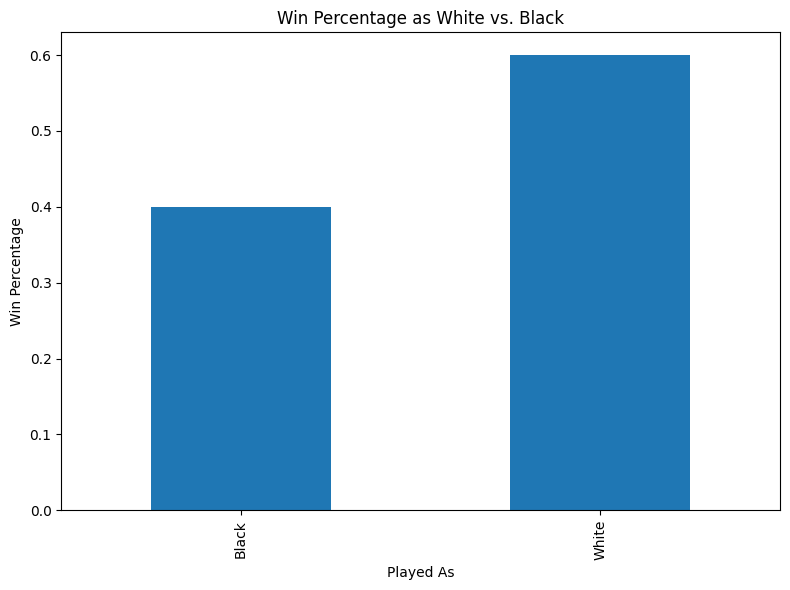

In [5]:
# Create a new column indicating if you were White or Black
df['PlayedAs'] = df.apply(lambda row: 'White' if row['White'] == 'trlnkle' else 'Black', axis=1)

# Calculate win percentage for each color
win_percentages = df.groupby('PlayedAs').apply(lambda x: (x['Result'] == '1-0').mean() if x.name == 'White' else (x['Result'] == '0-1').mean())
print(win_percentages)

# Visualize win percentages
plt.figure(figsize=(8, 6))
win_percentages.plot(kind='bar')
plt.title('Win Percentage as White vs. Black')
plt.xlabel('Played As')
plt.ylabel('Win Percentage')
plt.tight_layout()
plt.show()

## Rating Progression

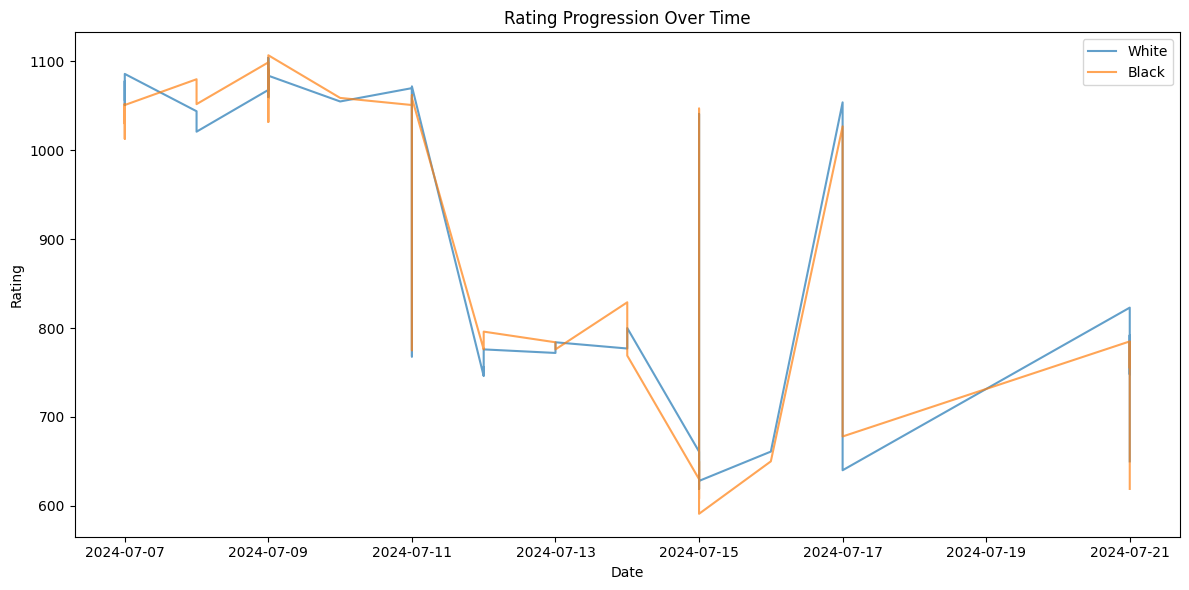

In [6]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df_sorted = df.sort_values('Date')

# Plot rating progression
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Date'], df_sorted['WhiteElo'], label='White', alpha=0.7)
plt.plot(df_sorted['Date'], df_sorted['BlackElo'], label='Black', alpha=0.7)
plt.title('Rating Progression Over Time')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend()
plt.tight_layout()
plt.show()

## Game Length Analysis

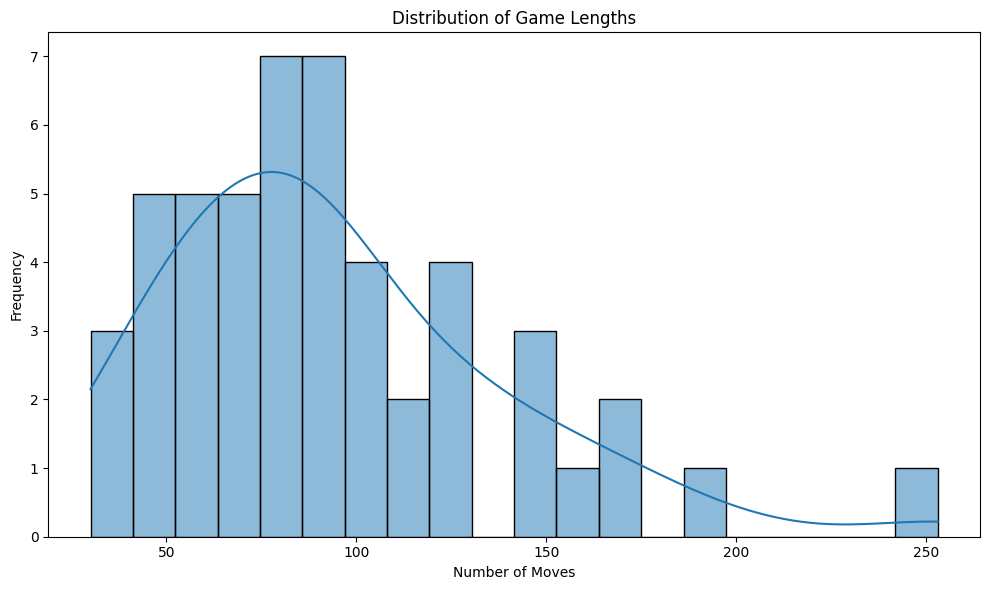

Average game length: 93.96 moves


In [7]:
# Count the number of moves in each game
df['NumMoves'] = df['Moves'].apply(lambda x: len(x.split()))

# Plot distribution of game lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['NumMoves'], bins=20, kde=True)
plt.title('Distribution of Game Lengths')
plt.xlabel('Number of Moves')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Calculate average game length
print(f"Average game length: {df['NumMoves'].mean():.2f} moves")